In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from PIL import Image
import yaml
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import cdist

In [2]:
origin = (-51.0, -51.0)
resolution = 0.05
occupied_thresh = 0.65
free_thresh = 0.196

In [3]:
pgm_file = '../marker/files/smalltown_world.pgm'

In [6]:
# from pgm_reader import Reader

# reader = Reader(pgm_file)
# reader.read_pgm()
# reader.read_yaml()

# reader.map

In [7]:
img = Image.open(pgm_file)
img = img.convert('L')  # 'L' mode is for grayscale
img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]


In [8]:

occupancy_grid = np.zeros_like(img_array, dtype=int)

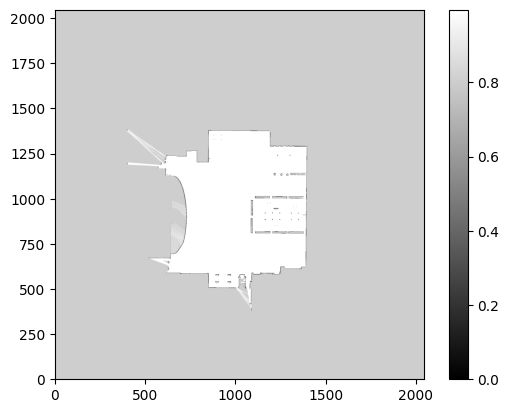

In [10]:
plt.imshow(img_array, cmap='gray', origin='lower')
plt.colorbar()

In [11]:
occupancy_grid[img_array > occupied_thresh] = 1
occupancy_grid[img_array < free_thresh] = 0
occupancy_grid[(img_array >= free_thresh) & (img_array <= occupied_thresh)] = -1


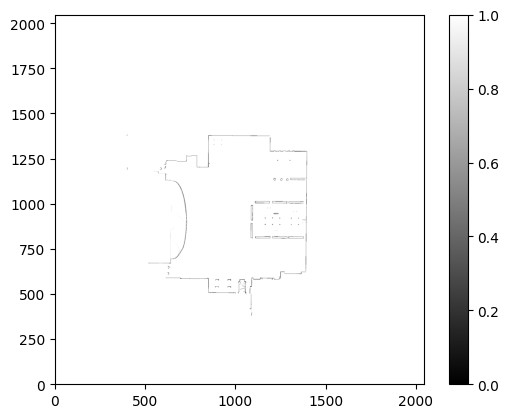

In [13]:
plt.imshow(occupancy_grid, cmap='gray', origin='lower')
plt.colorbar()

In [21]:
from utils import *
astar = AStar(occupancy_grid)

In [27]:
# calculate distance threshold and dilation radius for the voronoi diagram
distance_threshold = 4
dilation_radius = 2

In [28]:
from scipy.ndimage import distance_transform_edt, binary_dilation
# Step 1: Expand the obstacles (dilation)
expanded_obstacles = binary_dilation(occupancy_grid, structure=np.ones((dilation_radius, dilation_radius)))
expanded_obstacles = expanded_obstacles.astype(int)  # Convert back to int (1 = obstacle, 0 = free space)

# Step 2: Find free spaces in the modified occupancy grid
free_spaces = np.array(np.where(expanded_obstacles == 0)).T

In [29]:
free_spaces

array([[ 653, 1212],
       [ 653, 1213],
       [ 653, 1214],
       ...,
       [1459, 1187],
       [1459, 1194],
       [1459, 1195]])

In [30]:
free_spaces.shape[0]

1491